In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print('Class labels:',np.unique(y))

Class labels: [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1, stratify=y)
print('Labels count in y:', np.bincount(y))

Labels count in y: [50 50 50]


In [4]:
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
from plot_decision_regions import plot_decision_regions
import matplotlib.pyplot as plt

[[-2.43838721 -2.43838721 -2.43838721 ... -2.43838721 -2.43838721
  -2.43838721]
 [-2.41838721 -2.41838721 -2.41838721 ... -2.41838721 -2.41838721
  -2.41838721]
 [-2.39838721 -2.39838721 -2.39838721 ... -2.39838721 -2.39838721
  -2.39838721]
 ...
 [ 2.66161279  2.66161279  2.66161279 ...  2.66161279  2.66161279
   2.66161279]
 [ 2.68161279  2.68161279  2.68161279 ...  2.68161279  2.68161279
   2.68161279]
 [ 2.70161279  2.70161279  2.70161279 ...  2.70161279  2.70161279
   2.70161279]]
(258, 265)


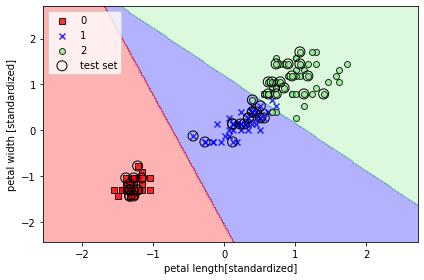

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C= 100.0, random_state=1,solver='lbfgs',multi_class='ovr')
lr.fit(X_train_std,y_train)
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X_combined_std,y_combined,classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'uppler left')
plt.tight_layout()
plt.show()


In [8]:
lr.predict_proba(X_test_std[:3,:])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [9]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [10]:
lr.predict(X_test_std[:3,:])

array([2, 0, 0])

In [11]:
lr.predict(X_test_std[0,:].reshape(1,-1))

array([2])

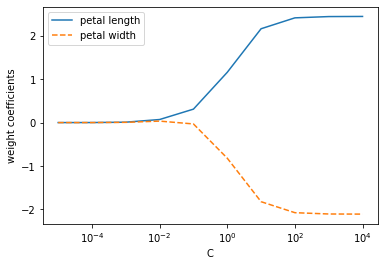

In [13]:
weights,params = [], []
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10.**c, random_state=1,solver='lbfgs',multi_class='ovr')
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params,weights[:,0],label='petal length')
plt.plot(params,weights[:,1], linestyle='--', label = 'petal width')
plt.ylabel('weight coefficients')
plt.xlabel('C')
plt.legend(loc = 'upper left')
plt.xscale ('log')
plt.show()


[[-2.43838721 -2.43838721 -2.43838721 ... -2.43838721 -2.43838721
  -2.43838721]
 [-2.41838721 -2.41838721 -2.41838721 ... -2.41838721 -2.41838721
  -2.41838721]
 [-2.39838721 -2.39838721 -2.39838721 ... -2.39838721 -2.39838721
  -2.39838721]
 ...
 [ 2.66161279  2.66161279  2.66161279 ...  2.66161279  2.66161279
   2.66161279]
 [ 2.68161279  2.68161279  2.68161279 ...  2.68161279  2.68161279
   2.68161279]
 [ 2.70161279  2.70161279  2.70161279 ...  2.70161279  2.70161279
   2.70161279]]
(258, 265)


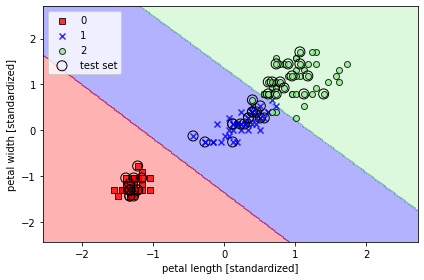

In [32]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()